**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [ ]:
from keras.datasets import fashion_mnist
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from sklearn.cluster import KMeans
import random
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.metrics.cluster import homogeneity_score
import keras
from sklearn.model_selection import train_test_split
import copy

Load the dataset and perform splitting into training and validation sets with 70:30 ratio

In [ ]:

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
trainX,trainY = np.concatenate((X_train, X_test)),np.concatenate((Y_train, Y_test))
trainX=trainX/255
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.3, random_state=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train,Y_train,test_size=0.3, random_state=1)

4423680/4422102 [==============================] - 0s 0us/step


Implement the K Means algorithm.

In [ ]:
class Kmeans:
    def __init__(self,X_train,Y_train,K): #DONE  #VERIFIED
        self.X_train=X_train
        self.Y_train=Y_train
        self.num_of_clusters=K
        self.iterations=150
        self.Centroid=[]
        self.values_in_cluster={}
        
    def euclid(self,A_matrix,B_matrix):
        A_matrix=np.array(A_matrix)
        B_matrix=np.array(B_matrix)
        dists = np.zeros((A_matrix.shape[0], B_matrix.shape[0]))
        for i in range(A_matrix.shape[0]):
            dists[i] = np.sum((B_matrix - A_matrix[i])**2, axis=1)
        return dists

    def manhattan(self,A_matrix,B_matrix):
        A_matrix=np.array(A_matrix)
        B_matrix=np.array(B_matrix)
        dists = np.zeros((A_matrix.shape[0], B_matrix.shape[0]))
        for i in range(A_matrix.shape[0]):
            dists[i] = np.sum(abs(B_matrix - A_matrix[i]), axis=1)
        return dists
    
    def forgy(self):
        rows=X_train.shape[0]
        rand_idx=np.random.choice(range(rows), replace = False, size = self.num_of_clusters)
        return X_train[rand_idx,:]
    
    def random(self):
        indices,mean_of_val = np.random.choice(range(0, self.num_of_clusters), replace = True, size = self.X_train.shape[0]),[]
        for count in range(self.num_of_clusters):
            temp_clust=X_train[indices == count]
            mean_of_val.append(temp_clust.mean(axis=0))
        cluster=np.concatenate([val[ None, :] for val in mean_of_val], axis = 0)
        return cluster
    
    def clustered_points(self,distance):  #partition the data into clusters
        self.clustered_data=[]
        for i in range(self.num_of_clusters):
            self.clustered_data.append([])
        for idx,row in enumerate(distance):
            minpos = list(distance[idx]).index(min(distance[idx]))
            self.clustered_data[minpos].append(self.X_train[idx])
    def calculate_centroid(self,C,distance_method):
        count,cluster=0,C
        for j in range(self.iterations):
            Cond=np.array_equal(cluster,self.clusters, equal_nan=False)
            if(Cond==True):
                if(count>5):
                    break
                else:
                    count+=1
            else:
                self.clusters=cluster
                if distance_method=="euclid":
                    distance=self.euclid(self.X_train,self.clusters)
                else:
                    distance=self.manhattan(self.X_train,self.clusters)
                new_cluster=[]
                clustered_data=self.clustered_points(distance)
                for i in range(self.num_of_clusters):
                    row=list(np.mean(np.array(self.clustered_data[i]), axis = 0))
                    new_cluster.append(row)
                cluster=np.array(new_cluster)
                count=0
    
    def fit(self,initializing_method,distance_method):
        if initializing_method=="forgy":
            cluster=self.forgy()
        else:
            cluster=self.random()
        new_cluster=[]
        self.clusters=cluster
        if distance_method=="euclid":
            list1=self.euclid(self.X_train,self.clusters)
        else:
            list1=self.manhattan(self.X_train,self.clusters)
        clustered_data=self.clustered_points(list1)
        for i in range(self.num_of_clusters):
            row=list(np.mean(np.array(self.clustered_data[i]), axis = 0))
            new_cluster.append(row)
        self.calculate_centroid(np.array(new_cluster),distance_method)
        return self.clusters

You need to find the optimal number of clusters using the elbow method and silhouette method.

In [ ]:
def elbow(X_train,Y_train,initialize,distance_method):
    error=[]
    K=[]
    for i in range(2,6):
        obj=Kmeans(X_train,Y_train,i)
        Centroids=obj.fit(initialize,distance_method)
        sum1=0
        min_dist=[]
        dist=obj.euclid(X_valid,Centroids)
        for j in range(dist.shape[0]):
            min_dist.append(min(dist[j]))
        new_min=[]
        for j in min_dist:
            j=j**2
            new_min.append(j)
        print("for K=",i,"error = ",sum(new_min))
        error.append(sum(new_min))
        K.append(i)
    return error,K
 

**Plot the error vs number of clusters graph while using the elbow method by taking Random partition method and forgy method for initializing clusters and Euclidean and Manhattan distance for calculating distance**

elbow method using forgy method as initialization and distance method used is Euclidean method
for K= 2 error =  1.8399332146244115e+17
for K= 3 error =  1.3739022740815587e+17
for K= 4 error =  1.1111824552228272e+17
for K= 5 error =  1.011514054996425e+17
for K= 6 error =  9.338698288223906e+16
for K= 7 error =  7.97955093891748e+16
for K= 8 error =  7.476003285181146e+16
for K= 9 error =  6.9616074130927624e+16
for K= 10 error =  6.69232628861315e+16
for K= 11 error =  6.434916814135898e+16
for K= 12 error =  6.009402638533368e+16


Text(0, 0.5, 'error')

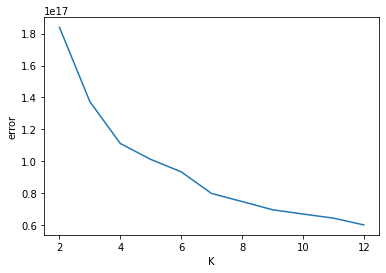

In [ ]:
print("elbow method using forgy method as initialization and distance method used is Euclidean method")
error,K=elbow(X_train,Y_train,"forgy","euclid")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

elbow method using forgy method as initialization and distance method used is Manhattan method
for K= 2 error =  1.839789560583734e+17
for K= 3 error =  1.369780290766198e+17
for K= 4 error =  1.1217677615614363e+17
for K= 5 error =  1.0211086404558571e+17
for K= 6 error =  9.21072652428486e+16
for K= 7 error =  8.833544655116202e+16
for K= 8 error =  7.840293699573176e+16
for K= 9 error =  8.009304015660282e+16
for K= 10 error =  6.764190596566489e+16
for K= 11 error =  6.800242320114209e+16
for K= 12 error =  6.5573145144770424e+16


Text(0, 0.5, 'error')

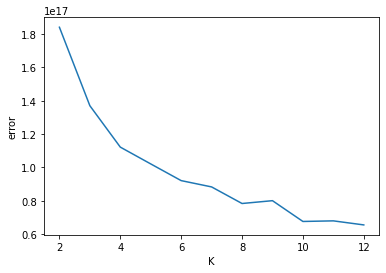

In [ ]:
print("elbow method using forgy method as initialization and distance method used is Manhattan method")
error,K=elbow(X_train,Y_train,"forgy","manhattan")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

elbow method using Random partition method as initialization and distance method used is Euclidean method
for K= 2 error =  1.8399332146244115e+17
for K= 3 error =  1.3738409965519734e+17
for K= 4 error =  1.2241966025645907e+17
for K= 5 error =  1.010901237544203e+17
for K= 6 error =  9.080486494908243e+16
for K= 7 error =  8.144310502563205e+16
for K= 8 error =  7.419396711828154e+16
for K= 9 error =  6.962209287209378e+16
for K= 10 error =  6.62492727661307e+16
for K= 11 error =  6.310524065725214e+16
for K= 12 error =  6.0766902957961864e+16


Text(0, 0.5, 'error')

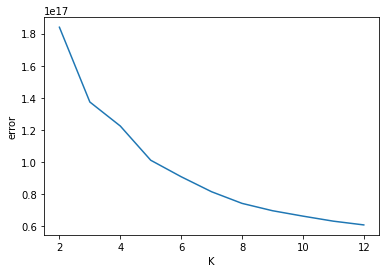

In [ ]:
print("elbow method using Random partition method as initialization and distance method used is Euclidean method")
error,K=elbow(X_train,Y_train,"random_partiton","euclid")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

elbow method using Random partition method as initialization and distance method used is Manhattan method
for K= 2 error =  1.839789560583734e+17
for K= 3 error =  1.36977841311498e+17
for K= 4 error =  1.2352429529825018e+17
for K= 5 error =  1.0211086404558571e+17
for K= 6 error =  9.157050748593533e+16
for K= 7 error =  8.472314116686133e+16
for K= 8 error =  8.098400913073603e+16
for K= 9 error =  7.107597311486254e+16
for K= 10 error =  6.763333609302219e+16
for K= 11 error =  6.799482640658646e+16
for K= 12 error =  6.326032969414758e+16


Text(0, 0.5, 'error')

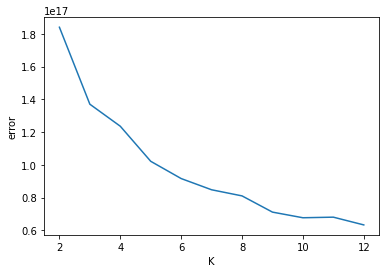

In [ ]:
print("elbow method using Random partition method as initialization and distance method used is Manhattan method")
error,K=elbow(X_train,Y_train,"random_partition","manhattan")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

**Report the training and the validation accuracy**

In [ ]:
def predict(X_test,Centroids,obj):
    cluster_label=[]
    list1=obj.euclid(X_test,Centroids)
    for i in range(list1.shape[0]):
        minpos = list(list1[i]).index(min(list1[i]))
        cluster_label.append(minpos)
    return np.array(cluster_label)

Homogeneity Score on validation data taking forgy method for initialization and euclidean method for distance calculation and k=10 

In [ ]:
obj=Kmeans(X_train,Y_train,10)
Centroids=obj.fit("forgy","euclid")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))

0.525661129047801


Homogeneity Score on validation data taking Random partition method for initialization and euclidean method for distance calculation and k=10



In [ ]:
obj=Kmeans(X_train,Y_train,10)
Centroids=obj.fit("random_partition","euclid")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))

0.5260257018583704


Homogeneity Score on validation data taking forgy method for initialization and Manhattan method for distance calculation and k=10



In [ ]:
obj=Kmeans(X_train,Y_train,10)
Centroids=obj.fit("forgy","manhattan")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))

0.5202946903064235


Homogeneity Score on validation data taking Random partition method for initialization and manhattan method for distance calculation and k=10



In [ ]:
obj=Kmeans(X_train,Y_train,10)
Centroids=obj.fit("random_partition","manhattan")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))

0.5302256591926463


**Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn**

In [ ]:
num_clusters=10
init_method="random"
kmeans= KMeans(n_clusters=num_clusters, init=init_method,random_state=0)
kmeans.fit(X_train)
y_pred_sk=kmeans.predict(X_test)
Homo_sk=homogeneity_score(y_pred_sk,Y_test)
print("Homogeneity score using sklearn is ",Homo_sk)

Homogeneity score using sklearn is  0.5259638379708819


In [ ]:
num_clusters=10
init_method="random"
obj=Kmeans(X_train,Y_train,num_clusters)
Centroids=obj.fit(init_method,"euclid")
y_pred=predict(X_test,Centroids,obj)
Homo_my=homogeneity_score(y_pred,Y_test)
print("Homogeneity score using my model is ",Homo_my)

Homogeneity score using my model is  0.5198112091942725


**Visualize the dataset to depict the clusters formed**

In [ ]:
def visualize_model(X_test,y_pred):
  model=TSNE(n_components=2,random_state=0)
  tsne_data=model.fit_transform(X_test)
  tsne_data=np.vstack((tsne_data.T,y_pred)).T
  tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))
  sns.FacetGrid(tsne_df,hue="label",height=10).map(plt.scatter,'Dim_1','Dim_2')
  plt.show()

In [ ]:
obj=Kmeans(X_train,Y_train,10)
Centroids=obj.fit("forgy","euclid")
y_pred=predict(X_test,Centroids,obj)


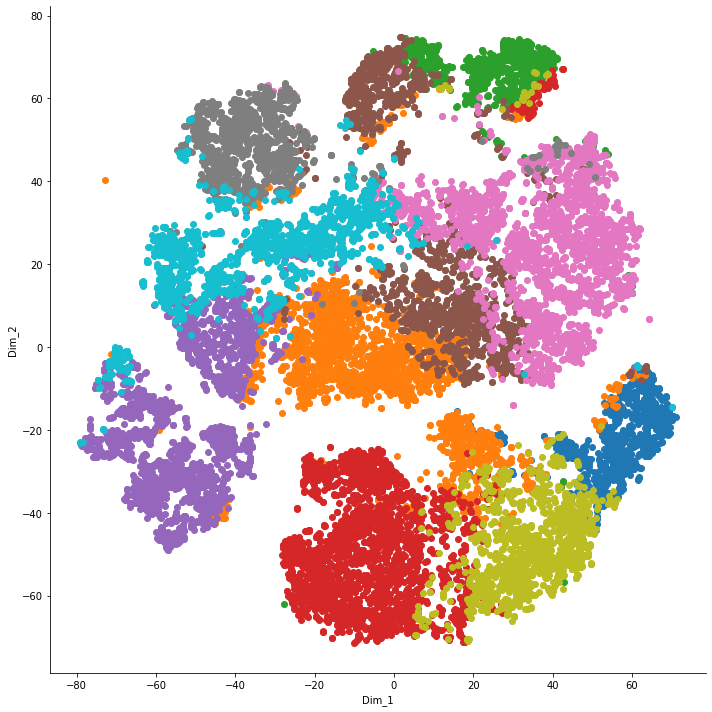

In [ ]:
visualize_model(X_test,y_pred)

# **KMEANS PLUS PLUS**

**Plot the error vs number of clusters graph while using the elbow method by taking Random partition method and forgy method for initializing clusters and Euclidean and Manhattan distance for calculating distance**

In [ ]:
class Kmeansplusplus2:
    def __init__(self,X_train,Y_train,K): #DONE  #VERIFIED
        self.X_train=X_train
        self.Y_train=Y_train
        self.num_of_clusters=K
        self.iterations=150
        self.Centroid=[]
        self.values_in_cluster={}
        
    def euclid(self,A_matrix,B_matrix):
        A_matrix=np.array(A_matrix)
        B_matrix=np.array(B_matrix)
        dists = np.zeros((A_matrix.shape[0], B_matrix.shape[0]))
        for i in range(A_matrix.shape[0]):
            dists[i] = np.sum((B_matrix - A_matrix[i])**2, axis=1)
        return dists

    def manhattan(self,A_matrix,B_matrix):
        A_matrix=np.array(A_matrix)
        B_matrix=np.array(B_matrix)
        dists = np.zeros((A_matrix.shape[0], B_matrix.shape[0]))
        for i in range(A_matrix.shape[0]):
            dists[i] = np.sum(abs(B_matrix - A_matrix[i]), axis=1)
        return dists
    
    def init_centroid(self):
        indexes=np.random.choice(range(self.X_train.shape[0]), replace = False,size = 1)
        self.clusters=self.X_train[indexes, :]
        for i in range(1,self.num_of_clusters):    
            list1=self.euclid(self.X_train,self.clusters)
            min_dist = np.amin(list1, axis=1)
            minpos = list(min_dist).index(max(min_dist))
            self.clusters =np.vstack([self.clusters,self.X_train[minpos]])
        return self.clusters   
    
    def clustered_points(self,distance):  #partition the data into clusters
        self.clustered_data=[]
        for i in range(self.num_of_clusters):
            self.clustered_data.append([])
        for idx,row in enumerate(distance):
            minpos = list(distance[idx]).index(min(distance[idx]))
            self.clustered_data[minpos].append(self.X_train[idx])
    def calculate_centroid(self,C,distance_method):
        count,cluster=0,C
        for j in range(self.iterations):
            Cond=np.array_equal(cluster,self.clusters, equal_nan=False)
            if(Cond==True):
                if(count>5):
                    break
                else:
                    count+=1
            else:
                self.clusters=cluster
                if distance_method=="euclid":
                    distance=self.euclid(self.X_train,self.clusters)
                else:
                    distance=self.manhattan(self.X_train,self.clusters)
                new_cluster=[]
                clustered_data=self.clustered_points(distance)
                for i in range(self.num_of_clusters):
                    row=list(np.mean(np.array(self.clustered_data[i]), axis = 0))
                    new_cluster.append(row)
                cluster=np.array(new_cluster)
                count=0
    
    def fit(self,distance_method):
        cluster=self.init_centroid()
        new_cluster=[]
        self.clusters=cluster
        if distance_method=="euclid":
            list1=self.euclid(self.X_train,self.clusters)
        else:
            list1=self.manhattan(self.X_train,self.clusters)
        clustered_data=self.clustered_points(list1)
        for i in range(self.num_of_clusters):
            row=list(np.mean(np.array(self.clustered_data[i]), axis = 0))
            new_cluster.append(row)
        self.calculate_centroid(np.array(new_cluster),distance_method)
        return self.clusters

In [ ]:
def elbow2(X_train,Y_train,distance_method):
    error=[]
    K=[]
    for i in range(2,10):
        obj=Kmeansplusplus2(X_train,Y_train,i)
        Centroids=obj.fit(distance_method)
        sum1=0
        min_dist=[]
        dist=obj.euclid(X_valid,Centroids)
        for j in range(dist.shape[0]):
            min_dist.append(min(dist[j]))
        new_min=[]
        for j in min_dist:
            j=j**2
            new_min.append(j)
        print("for K=",i,"error = ",sum(new_min))
        error.append(sum(new_min))
        K.append(i)
    return error,K
 

**Plot the error vs number of clusters graph while using the elbow method by taking Random partition method and forgy method for initializing clusters and Euclidean and Manhattan distance for calculating distance**

elbow method on kmeans++ ,distance method used is Euclidean method
for K= 2 error =  1.840000779301572e+17
for K= 3 error =  1.3739022740815587e+17
for K= 4 error =  1.1108732812570672e+17
for K= 5 error =  1.0111146694568661e+17
for K= 6 error =  9.351241373639134e+16
for K= 7 error =  7.979655445666008e+16
for K= 8 error =  7.694845436681746e+16
for K= 9 error =  6.961703555896121e+16
for K= 10 error =  6.873638069627335e+16
for K= 11 error =  6.4374305333673944e+16
for K= 12 error =  6.2265413478687144e+16


Text(0, 0.5, 'error')

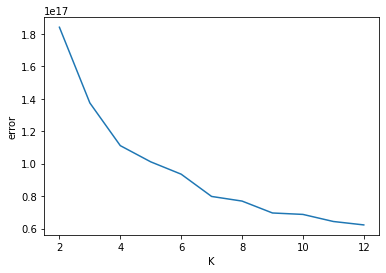

In [ ]:
print("elbow method on kmeans++ ,distance method used is Euclidean method")
error,K=elbow2(X_train,Y_train,"euclid")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

elbow method on kmeans++ ,distance method used is Manhattan method
for K= 2 error =  1.839783401151855e+17
for K= 3 error =  1.3697829207346491e+17
for K= 4 error =  1.23514954704333e+17
for K= 5 error =  1.0211835838751515e+17
for K= 6 error =  9.070672511391243e+16
for K= 7 error =  8.592115599736243e+16
for K= 8 error =  8.693190903437099e+16
for K= 9 error =  7.63090194893e+16
for K= 10 error =  6.933527393294577e+16
for K= 11 error =  6.322470086547981e+16
for K= 12 error =  6.20145142052308e+16


Text(0, 0.5, 'error')

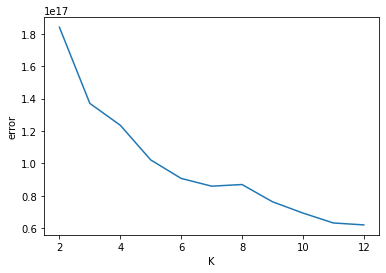

In [ ]:
print("elbow method on kmeans++ ,distance method used is Manhattan method")
error,K=elbow2(X_train,Y_train,"manhattan")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

**Report the training and the validation accuracy**

Homogeneity Score on validation data taking euclidean method for distance calculation and k=10

In [ ]:
obj=Kmeansplusplus2(X_train,Y_train,10)
Centroids=obj.fit("euclid")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))

0.5260257018583706


Homogeneity Score on validation data taking Manhattan method for distance calculation and k=10

In [ ]:
obj=Kmeansplusplus2(X_train,Y_train,10)
Centroids=obj.fit("manhattan")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))

0.5203002568229315


**Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn**

In [ ]:
kmeans=Kmeansplusplus(X_train,Y_train,10)
Centroids=obj.fit("euclid")
y_pred=predict(X_test,Centroids,obj)
Homo_my2=homogeneity_score(y_pred,Y_test)
print("Homogeneity score using my model is ",Homo_my2)

Homogeneity score using my model is  0.4972563549061159


In [ ]:
kmeans= KMeans(n_clusters=10,random_state=0).fit(X_train)
y=kmeans.predict(X_test)
Homo_my2=homogeneity_score(y,Y_test)
print("Homogeneity score using sklearn is ",Homo_my2)

Homogeneity score using sklearn is  0.5260457029730347


**Visualize the dataset to depict the clusters formed.**

In [ ]:
obj=Kmeansplusplus(X_train,Y_train,10)
Centroids=obj.fit("euclid")
y_pred=predict(X_test,Centroids,obj)


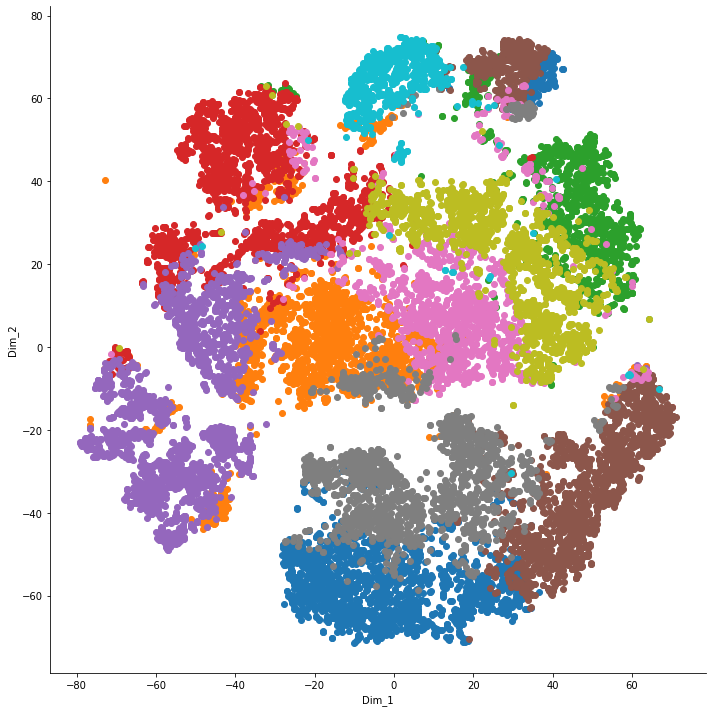

In [ ]:
visualize_model(X_test,y_pred)

In [ ]:
df=pd.read_csv('data.csv', sep=',',header=None)
data=df.to_numpy()

Y_main,X_main=data[:,data.shape[1]-1],data[:,:data.shape[1]-1]
X_output,X_input=data[:,data.shape[1]-2],data[:,0]
X_main=np.delete(X_main, [0, X_main.shape[1]-1], 1)

for idx,label in enumerate(X_input):
    X_input[idx]=float(X_input[idx].split("[")[1])
    
for idx,label in enumerate(X_output):
    X_output[idx]=float(X_output[idx].split("]")[0])

X_main = np.insert(X_main, 0, X_input, axis=1)

X_main = np.insert(X_main, X_main.shape[1], X_output, axis=1)

all_zero=[]
row=X_main.shape[1]
for i in range(row):
    if(np.all((X_main[:,i] == 0))):
        all_zero.append(i)
val=all_zero
X_main=np.delete(X_main, val, axis=1)

In [ ]:
X_main=X_main/255
X_train, X_test, Y_train, Y_test = train_test_split(X_main,Y_main,test_size=0.3, random_state=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train,y_train,test_size=0.3, random_state=1)
print(X_train.shape,X_valid.shape,X_test.shape)

(20580, 161) (8820, 161) (18000, 161)


**Plot the error vs number of clusters graph while using the elbow method by taking Random partition method and forgy method for initializing clusters and Euclidean and Manhattan distance for calculating distance**

elbow method using forgy method as initialization and distance method used is Euclidean method
for K= 2 error =  230910293.60039878
for K= 3 error =  148736429.12092358
for K= 4 error =  91091487.76536654
for K= 5 error =  77208679.57101464


Text(0, 0.5, 'error')

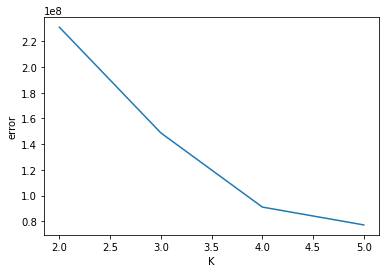

In [ ]:
print("elbow method using forgy method as initialization and distance method used is Euclidean method")
error,K=elbow(X_train,Y_train,"forgy","euclid")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

In [ ]:
print("elbow method using forgy method as initialization and distance method used is Manhattan method")
error,K=elbow(X_train,Y_train,"forgy","manhattan")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

elbow method using Random partition method as initialization and distance method used is Euclidean method
for K= 2 error =  230894205.65370315
for K= 3 error =  148736429.12092358
for K= 4 error =  91090828.60937439
for K= 5 error =  76877097.94965748


Text(0, 0.5, 'error')

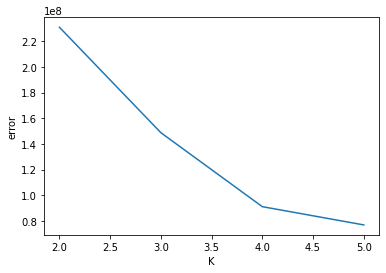

In [ ]:
print("elbow method using Random partition method as initialization and distance method used is Euclidean method")
error,K=elbow(X_train,Y_train,"random_partiton","euclid")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

In [ ]:
print("elbow method using Random partition method as initialization and distance method used is Manhattan method")
error,K=elbow(X_train,Y_train,"random_partition","manhattan")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

**Homogeneity Score on validation data taking Manhattan method for distance calculation and k=10 and Visualize the dataset to depict the clusters formed.**

0.4778938633719456


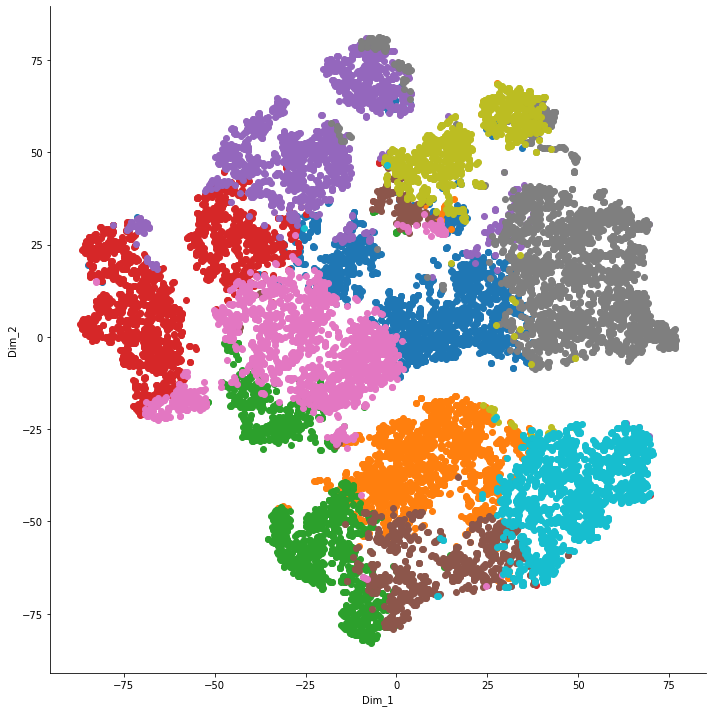

In [ ]:
obj=Kmeans(X_train,Y_train,10)
Centroids=obj.fit("forgy","euclid")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))
visualize_model(X_test,y_pred)

In [ ]:
obj=Kmeans(X_train,Y_train,10)
Centroids=obj.fit("random_partition","manhattan")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))

0.5187658607906445


**Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn**

In [ ]:
num_clusters=10
init_method="random"
kmeans= KMeans(n_clusters=num_clusters, init=init_method,random_state=0)
kmeans.fit(X_train)
y_pred_sk=kmeans.predict(X_test)
Homo_sk=homogeneity_score(y_pred_sk,Y_test)
print("Homogeneity score using sklearn is ",Homo_sk)

Homogeneity score using sklearn is  0.4790149646632429


# KMEANS PLUS PLUS

Plot the error vs number of clusters graph while using the elbow method by taking Random partition method and forgy method for initializing clusters and Euclidean and Manhattan distance for calculating distance

elbow method on kmeans++ ,distance method used is Euclidean method
for K= 2 error =  230910293.60039878
for K= 3 error =  148736429.12092358
for K= 4 error =  91091243.37636109
for K= 5 error =  77211959.05328883
for K= 6 error =  63487481.77199238
for K= 7 error =  52110818.58786554
for K= 8 error =  45146765.971434586
for K= 9 error =  39940479.53709051


Text(0, 0.5, 'error')

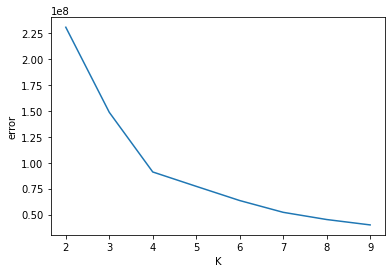

In [ ]:
print("elbow method on kmeans++ ,distance method used is Euclidean method")
error,K=elbow2(X_train,Y_train,"euclid")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

elbow method on kmeans++ ,distance method used is Manhattan method
for K= 2 error =  234501174.62475523
for K= 3 error =  153301391.83907723
for K= 4 error =  91345296.58005121
for K= 5 error =  77731730.61424205
for K= 6 error =  67690547.8223138
for K= 7 error =  52200003.77188262
for K= 8 error =  45210262.4820875
for K= 9 error =  40760446.49361073


Text(0, 0.5, 'error')

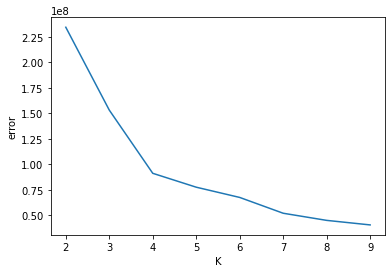

In [ ]:
print("elbow method on kmeans++ ,distance method used is Manhattan method")
error,K=elbow2(X_train,Y_train,"manhattan")
plt.plot(K, error)
plt.xlabel('K')
plt.ylabel('error')

**Homogeneity Score on validation data taking Manhattan method for distance calculation and k=10 and Visualize the dataset to depict the clusters formed.**

In [ ]:
obj=Kmeansplusplus2(X_train,Y_train,10)
Centroids=obj.fit("euclid")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))

0.4730188414585954


**Visualize the dataset to depict the clusters formed.**

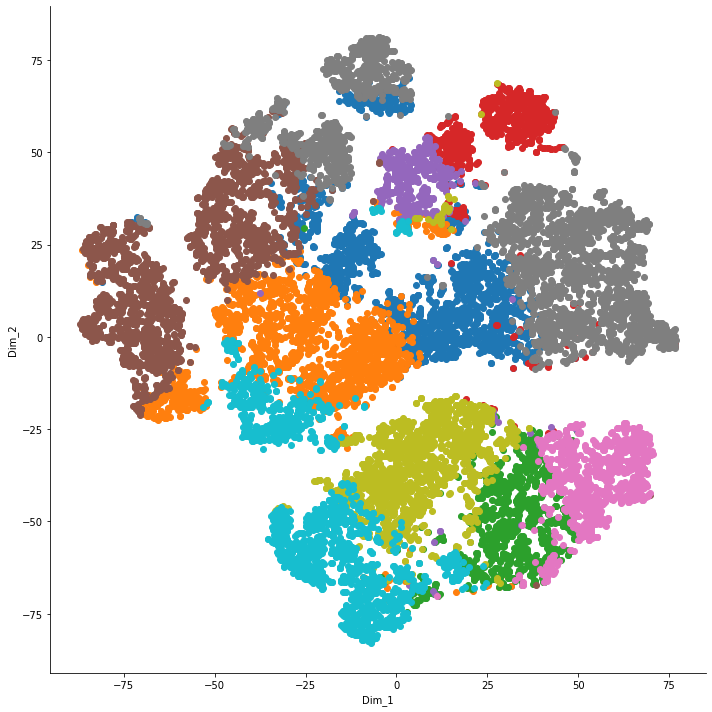

In [ ]:
visualize_model(X_test,y_pred)

In [ ]:
obj=Kmeansplusplus2(X_train,Y_train,5)
Centroids=obj.fit("manhattan")
y_pred=predict(X_test,Centroids,obj)
print(homogeneity_score(y_pred,Y_test))

0.5018028644969047


**Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn**

In [ ]:
kmeans= KMeans(n_clusters=10,random_state=0).fit(X_train)
y=kmeans.predict(X_test)
Homo_sk2=homogeneity_score(y,Y_test)
print("Homogeneity score using sklearn is ",Homo_sk2)

Homogeneity score using sklearn is  0.48768484849572924
